# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [44]:
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

Text(0.5, 1.0, 'Tardies vs Age')

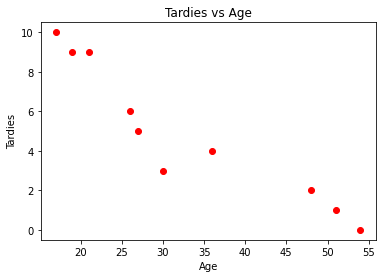

In [45]:
plt.scatter(x='Age', y='Tardies', data=student_data, marker='o', color='red')
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title('Tardies vs Age')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*Parece que se observa una tendencia negativa que relaciona negativamente la edad con la tardanza en clase, es decir, a menor edad, más tardanza* 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [59]:
covariance = np.cov(student_data.Age, student_data.Tardies)
print(f'Coviariance is: ', covariance)
coef, p = pearsonr(student_data['Age'], student_data['Tardies'])
print(f' Pearson Coefficent is {coef}, p-value associated is {p}')
student_data.corr()


Coviariance is:  [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]
 Pearson Coefficent is -0.9391626886887121, p-value associated is 5.5666538345534396e-05


,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


*La covarianza indica dirección y el grado de variación entre dos variables,
mientras que la correlación indica la dirección y el grado de dependencia entre dichas variables. Además, mientras que la covarianza tiene las unidades de las variables, la correlación es adimensional.*

*El test de Pearson nos informa de que ambas variables están fuertemente relacionada con un -93%.*

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

*La variable resultante (o outcome (y)) sería 'Tardies'.\
Usamos una regresión lineal porque ambas variables son numéricas.*

In [61]:
import statsmodels.api as sm
X = student_data[["Age"]]
X = sm.add_constant(X) 
Y = student_data["Tardies"]

model = sm.OLS(Y, X).fit()
model.summary()

/usr/local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           5.57e-05
Time:                        16:49:40   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

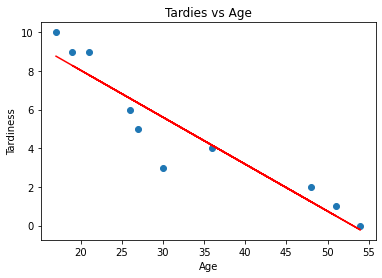

In [48]:
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Tardiness')
plt.title('Tardies vs Age')
plt.plot(x, slope*x + intercept, c='red')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*'Age' parece un buen predictor para 'Tardiness'.*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [49]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

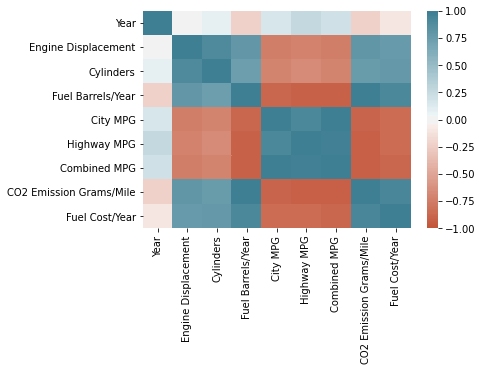

In [50]:
subset = vehicles[['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

corr = vehicles.corr()
#print(corr)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)

*Las variables más importantes para determinar las emisiones de CO2 son Fuel Barrels/Year, Fuel Cost/Year y Combined MPG. Las demás variables están más o menos relacionadas con esas tres, de modo que nos aportan información "redundante".\
Diría que la variable menos importante es Year.*


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [66]:
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()


*La 'outcome variable' será CO2 Emission Grams/Miles y estaremos usando un modelo de regresión lineal múltiple.* 

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Mon, 23 Nov 2020   Prob (F-statistic):                        0.00
Time:                             16:53:32   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

*Las variables más importantes en el modelo son "Fuel Barrels/Year" and "Combined MPG".
Hemos obtenido una R cuadrado de 0.999 de modo que casi toda la variabilidad depende de las variables incluídas en el modelo, no de variables externas.*

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [37]:
data = pd.DataFrame({'X':[1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

R-squared value is : 0.9652303546573691


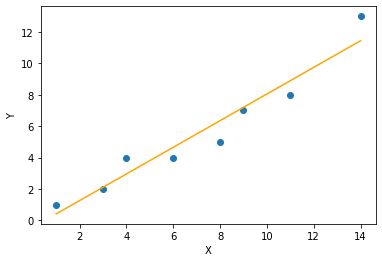

In [68]:
x = data['X']
y = data['Y']
slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, slope*x + intercept, c='orange')
print(f'R-squared value is : {r_value}')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*Hay una fuerte relación entre ambas variables*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

R-squared value is : 0.971278116825086


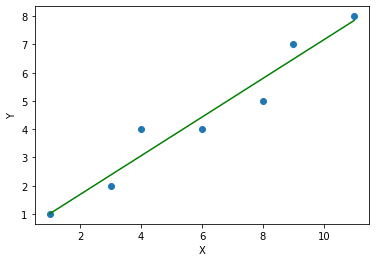

In [69]:
x = data['X'][0:-1]
y = data['Y'][0:-1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, slope*x + intercept, c='green')
print(f'R-squared value is : {r_value}')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*Eliminar los outliers ha mejorado el valor de la R-cuadrado, es decir, la dependencia de ambas variables.*